# 911 Calls Capstone Project
The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import CSV file and convert to dataframe
calls_csv = pd.read_csv('Resources/911.csv')
calls = pd.DataFrame(calls_csv)
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
#Determine data types
calls.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

In [4]:
#Check for null values
calls.isnull().sum()

lat              0
lng              0
desc             0
zip          52129
title            0
timeStamp        0
twp            159
addr             0
e                0
dtype: int64

## Creating New Features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value

In [7]:
#Example
calls['title'].iloc[0]

'EMS: BACK PAINS/INJURY'

In [47]:
# Split 'title' string and create store results in a new column
calls['Reason'] = calls['title'].apply(lambda title: title.split(":")[0]) #for titles in 'title' column apply title.split(':')

In [48]:
calls['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

### 1. Which areas have the highest call volume?

In [5]:
#Top 5 zips
calls['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [6]:
#Top 5 townships
calls['twp'].value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

#### What is the most common Reason for a 911 call based off of this new column? **

In [10]:
reason_count = calls['Reason'].value_counts()

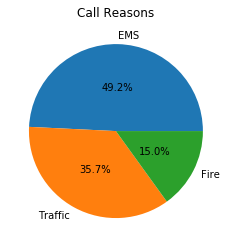

In [11]:
labels = reason_count.index
plt.pie(reason_count,labels = labels, autopct="%1.1f%%", pctdistance=.5)

plt.title('Call Reasons')
plt.show()

#### Create a similar plot for the top 911 call types

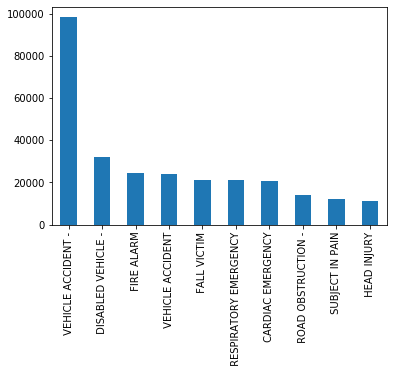

In [12]:
calls['Type'].value_counts().head(10).plot(kind='bar')

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [13]:
type(calls['timeStamp'][0])

str

In [14]:
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'])
type(calls['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.

In [15]:
calls['Hour'] = calls['timeStamp'].apply(lambda timeStamp: timeStamp.hour)
calls['Month'] = calls['timeStamp'].apply(lambda timeStamp: timeStamp.month)
calls['Day of Week'] = calls['timeStamp'].apply(lambda timeStamp: timeStamp.dayofweek)
calls['Day'] = calls['timeStamp'].apply(lambda timeStamp: timeStamp.day)
calls['Year'] = calls['timeStamp'].apply(lambda timeStamp: timeStamp.year)

In [16]:
calls.head().iloc[:,-4:]

,Month,Day of Week,Day,Year
0,12,3,10,2015
1,12,3,10,2015
2,12,3,10,2015
3,12,3,10,2015
4,12,3,10,2015


#### Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
calls['Day of Week'] = calls['Day of Week'].map(dmap)

In [18]:
calls['Day of Week'].unique()

array(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

#### Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

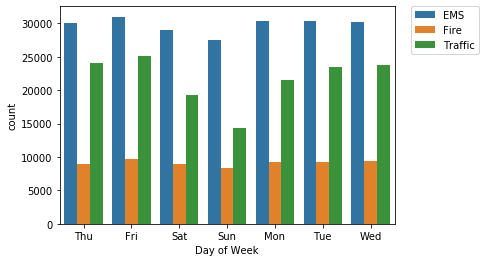

In [19]:
sns.countplot(x='Day of Week', hue='Reason', data=calls)

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

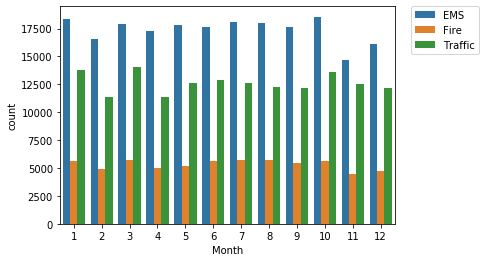

In [20]:
sns.countplot(x='Month', hue='Reason', data=calls)

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [21]:
byMonth = calls.groupby(['Month']).count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Type,Hour,Day of Week,Day,Year
Month,,,,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644,35644,35644,35644
6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171,36171,36171,36171
7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405,36405,36405,36405
8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972,35972,35972,35972
9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339,35339,35339,35339


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

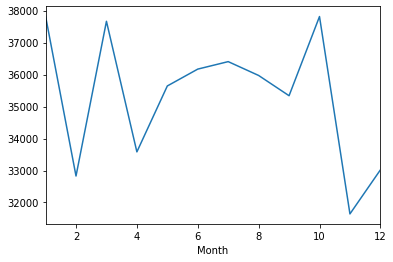

In [22]:
byMonth['title'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

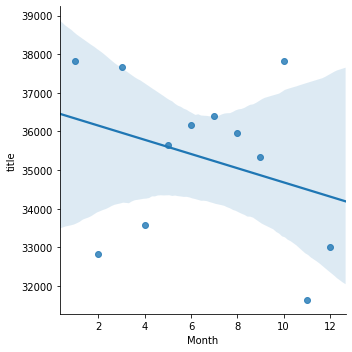

In [23]:
sns.lmplot(x='Month',y='title',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [24]:
calls['Date']=calls['timeStamp'].apply(lambda t: t.date())
calls['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
423904    2018-11-16
423905    2018-11-16
423906    2018-11-16
423907    2018-11-16
423908    2018-11-16
Name: Date, Length: 423909, dtype: object

# Is call volume consistent overtime?


In [25]:
#Consecutive dataset?
calls.groupby(['Year'])['Month'].unique()

Year
2015                                       [12]
2016    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2018        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Name: Month, dtype: object

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

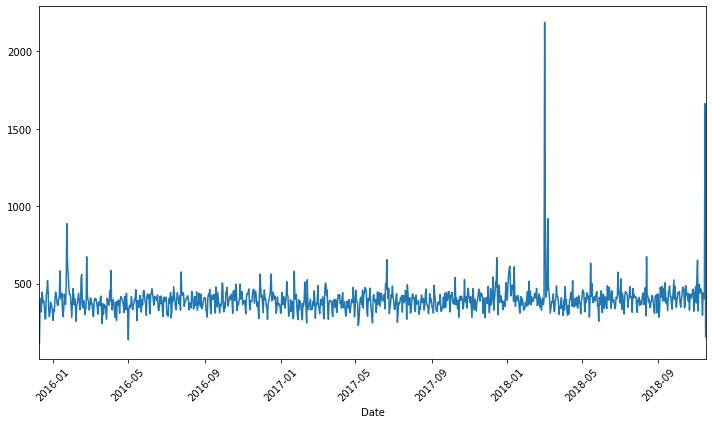

In [26]:
plt.figure(figsize=(10,6))
calls.groupby('Date').count()['title'].plot()
plt.xticks(rotation=45, ha='center')
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

#### all on one?

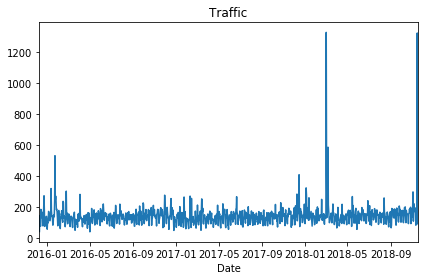

In [27]:
calls[calls['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

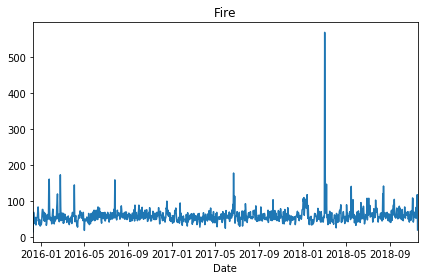

In [28]:
calls[calls['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

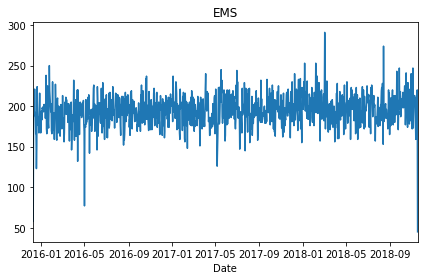

In [29]:
calls[calls['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

# Investigating Outliers

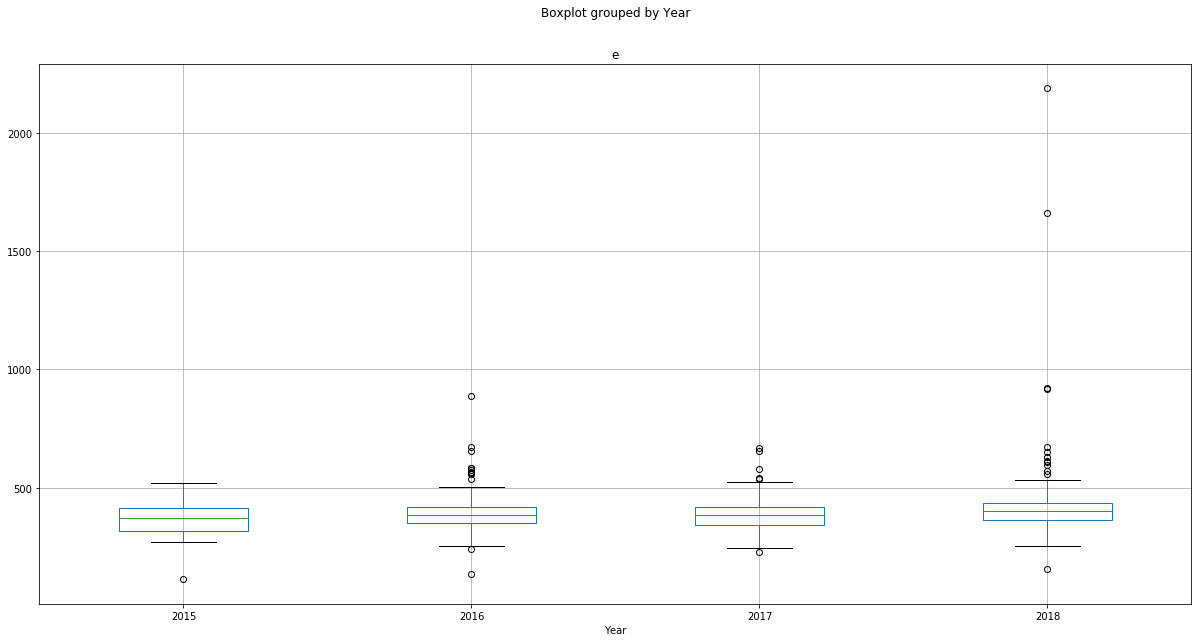

In [30]:
byYear = calls.groupby(['Year','Date']).count()
byYear

byYear.boxplot('e', by='Year', figsize=(20, 10))

In [31]:
#Find outliers
Q1 =  byYear['e'].quantile(0.25)
Q3 = byYear['e'].quantile(0.75)
IQR = Q3 - Q1

outliers = byYear[(byYear['e'] < Q1-1.5*IQR ) | (byYear['e'] > Q3+1.5*IQR)]['e']
outliers

Year  Date      
2015  2015-12-10     114
2016  2016-01-12     582
      2016-01-23     887
      2016-01-24     657
      2016-01-25     569
      2016-02-15     538
      2016-02-16     559
      2016-02-24     673
      2016-03-20     241
      2016-04-03     584
      2016-05-01     136
      2016-07-25     575
      2016-11-29     561
      2016-12-17     561
2017  2017-01-23     580
      2017-02-12     246
      2017-05-06     229
      2017-05-29     245
      2017-06-21     654
      2017-10-09     539
      2017-12-09     542
      2017-12-15     667
2018  2018-01-03     557
      2018-01-04     595
      2018-01-05     612
      2018-01-12     608
      2018-03-02    2187
      2018-03-03     917
      2018-03-07     920
      2018-05-15     631
      2018-06-28     573
      2018-07-03     530
      2018-08-13     674
      2018-11-02     534
      2018-11-03     651
      2018-11-15    1662
      2018-11-16     156
Name: e, dtype: int64

In [32]:
#due to number of outliers, arbitrarily chose 700
outliers_reduced = byYear[byYear['e'] > 700]['e']
outliers_reduced

Year  Date      
2016  2016-01-23     887
2018  2018-03-02    2187
      2018-03-03     917
      2018-03-07     920
      2018-11-15    1662
Name: e, dtype: int64

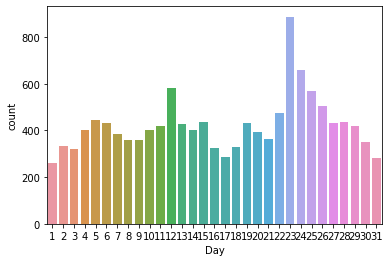

In [33]:
#Compare call volume during Jan 2016
only_2018 = calls[(calls['Year'] == 2016) & (calls['Month'] == 1)]
sns.countplot(x='Day', data=only_2018)

# blizzard https://www.phillyvoice.com/blizzard-2016-hits-philly-region/

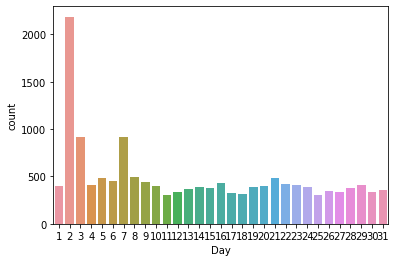

In [34]:
#Compare call volume during Mar 2018
only_2018 = calls[(calls['Year'] == 2018) & (calls['Month'] == 3)]
sns.countplot(x='Day', data=only_2018)

# Snow storm (and aftermath) https://en.wikipedia.org/wiki/March_1%E2%80%933,_2018_nor%27easter

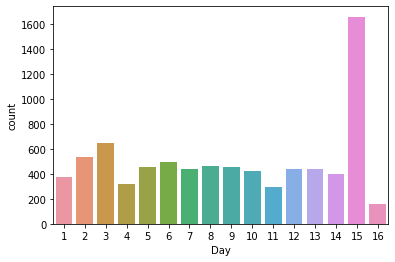

In [35]:
##Compare call volume during Nov 2018
only_2018 = calls[(calls['Year'] == 2018) & (calls['Month'] == 11)]
sns.countplot(x='Day', data=only_2018)

In [36]:
#incomplete month

# snow storm https://www.inquirer.com/philly/news/snow-philadelphia-winter-sleet-latest-20181115.html

# Now let's move on to creating  heatmaps with seaborn and our data. 
We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [37]:
day_and_hour = calls.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
day_and_hour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486


** Now create a HeatMap using this new DataFrame. **

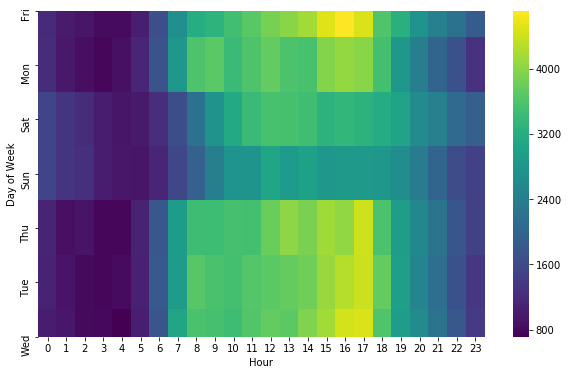

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(day_and_hour,cmap='viridis')

** Now create a clustermap using this DataFrame. **

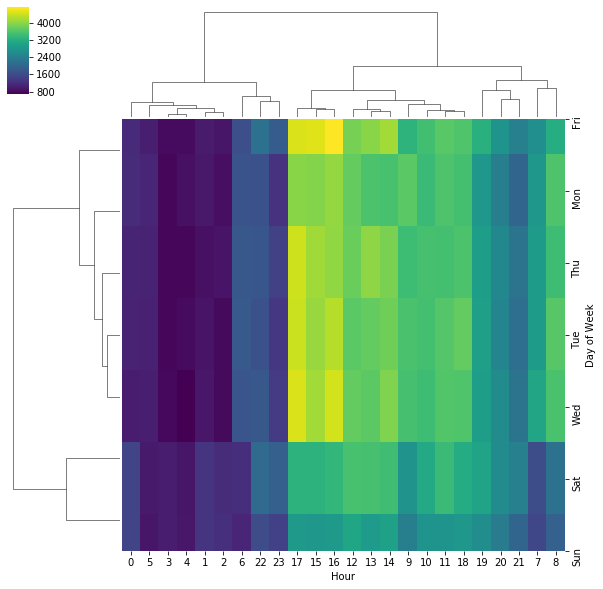

In [39]:
sns.clustermap(day_and_hour,cmap='viridis')

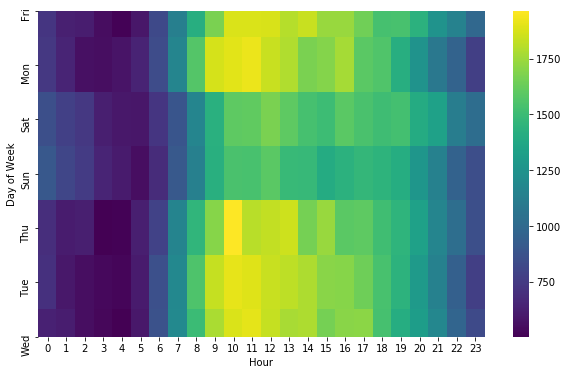

In [40]:
ems_calls = calls[calls['Reason'] == 'EMS']

day_and_hour = ems_calls.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
#day_and_hour.head()

plt.figure(figsize=(10,6))
sns.heatmap(day_and_hour,cmap='viridis')

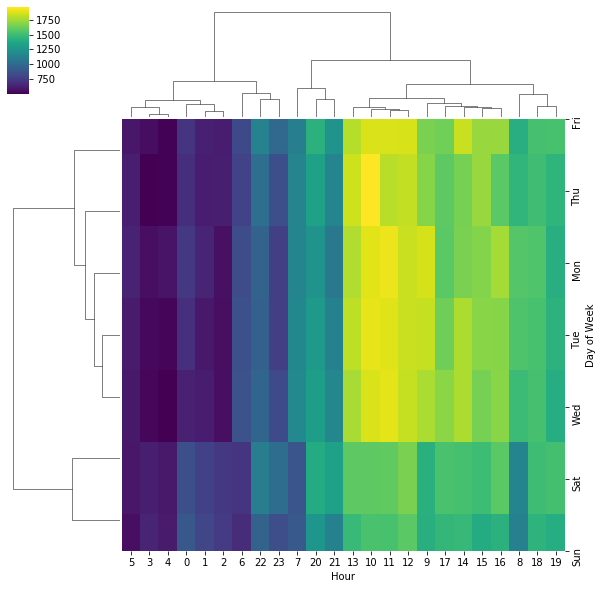

In [41]:
sns.clustermap(day_and_hour,cmap='viridis')

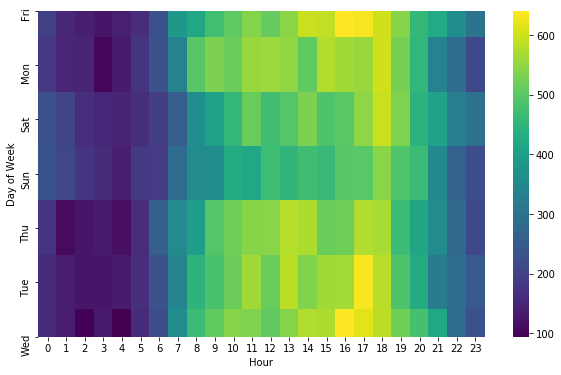

In [42]:
ems_calls = calls[calls['Reason'] == 'Fire']

day_and_hour = ems_calls.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
#day_and_hour.head()

plt.figure(figsize=(10,6))
sns.heatmap(day_and_hour,cmap='viridis')

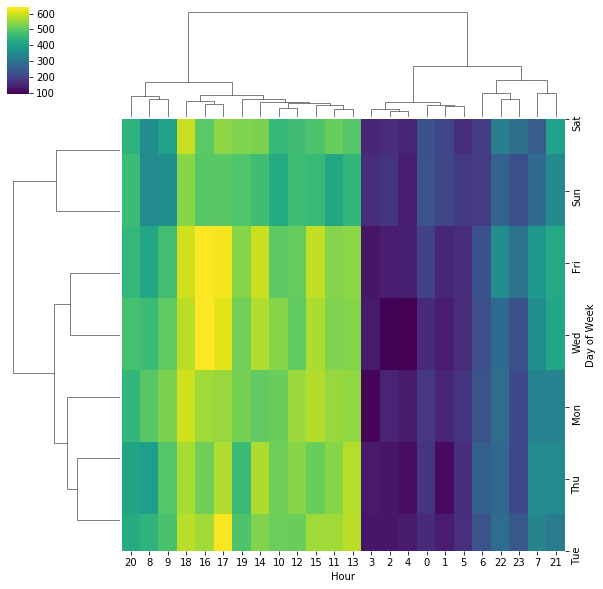

In [43]:
sns.clustermap(day_and_hour,cmap='viridis')

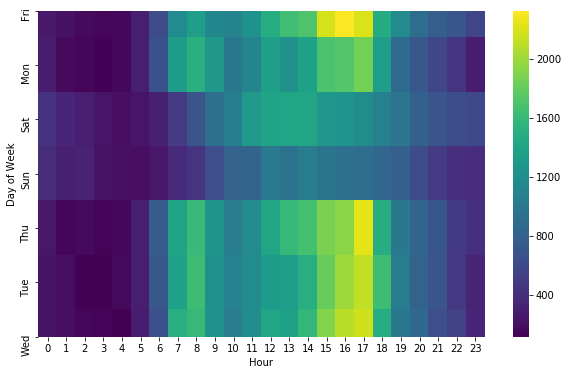

In [44]:
ems_calls = calls[calls['Reason'] == 'Traffic']

day_and_hour = ems_calls.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
#day_and_hour.head()

plt.figure(figsize=(10,6))
sns.heatmap(day_and_hour,cmap='viridis')

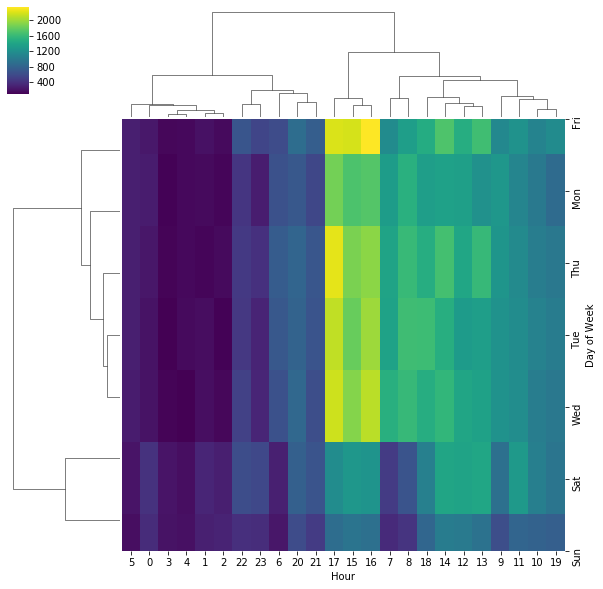

In [45]:
sns.clustermap(day_and_hour,cmap='viridis')